In [66]:
#To predict the value of customers: either high value or not

In [193]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from sklearn import preprocessing
%matplotlib inline

In [208]:
customer_classes=pd.read_csv(r"E:\My Python codes\Customer_classes.csv", index_col='customer_id')
customer_classes

,gender,age,state,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,property_valuation,class
customer_id,,,,,,,,,,
1,Female,64.0,NSW,93,Health,Mass Customer,Yes,11.0,10,High Value
2,Male,37.0,NSW,81,Financial Services,Mass Customer,Yes,16.0,10,Mid Value
4,Male,56.0,QLD,33,IT,Mass Customer,No,7.0,9,Mid Value
5,Female,40.0,NSW,56,Health,Affluent Customer,Yes,8.0,4,Mid Value
6,Male,51.0,VIC,35,Retail,High Net Worth,Yes,13.0,9,Mid Value
...,...,...,...,...,...,...,...,...,...,...
3496,Male,31.0,NSW,99,Manufacturing,Mass Customer,Yes,19.0,9,Mid Value
3497,Female,31.0,VIC,73,Manufacturing,Affluent Customer,Yes,18.0,5,Mid Value
3498,Female,22.0,VIC,28,Manufacturing,Mass Customer,No,5.0,4,Mid Value


In [120]:
print(stats.normaltest(customer_classes["age"]))

NormaltestResult(statistic=299.6888476010341, pvalue=8.382886758458118e-66)


In [121]:
stat, p = shapiro(customer_classes["age"])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.964, p=0.000


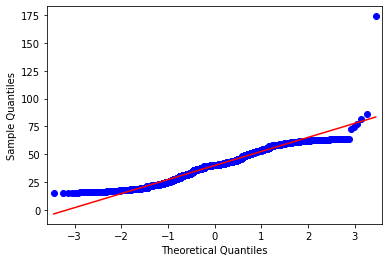

In [122]:
qqplot(customer_classes["age"], line='s')
plt.show()

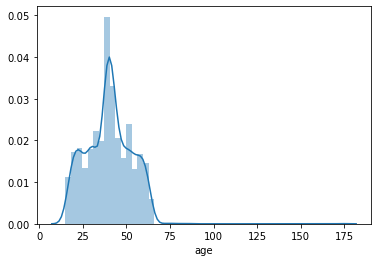

In [123]:
ax = sns.distplot(customer_classes["age"])

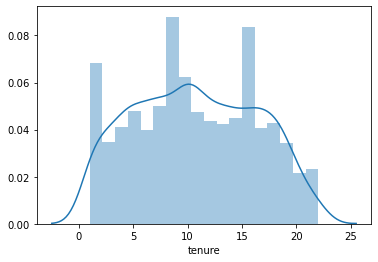

In [124]:
ax = sns.distplot(customer_classes["tenure"])

p <= 0.05: reject H0, not normal.
p > 0.05: fail to reject H0, normal.

In [116]:
customer_classes.describe()

,age,past_3_years_bike_related_purchases,tenure,property_valuation
count,3489.000000,3489.000000,3489.000000,3489.000000
mean,39.864144,48.795930,10.666380,7.515907
std,12.644096,28.607358,5.613193,2.822408
min,15.000000,0.000000,1.000000,1.000000
25%,31.000000,24.000000,6.000000,6.000000
50%,40.000000,48.000000,10.000000,8.000000
75%,49.000000,73.000000,15.000000,10.000000
max,174.000000,99.000000,22.000000,12.000000


In [69]:
customer_classes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3489 entries, 1 to 3500
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   gender                               3489 non-null   object 
 1   age                                  3489 non-null   float64
 2   state                                3489 non-null   object 
 3   past_3_years_bike_related_purchases  3489 non-null   int64  
 4   job_industry_category                3489 non-null   object 
 5   wealth_segment                       3489 non-null   object 
 6   owns_car                             3489 non-null   object 
 7   tenure                               3489 non-null   float64
 8   property_valuation                   3489 non-null   int64  
 9   class                                3489 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 299.8+ KB


In [70]:
customer_classes['gender'].value_counts()

Female    1758
Male      1654
U           77
Name: gender, dtype: int64

In [209]:
jic = pd.get_dummies(customer_classes['job_industry_category'])
jic

,Argiculture,Entertainment,Financial Services,Health,IT,Manufacturing,Property,Retail,Telecommunications
customer_id,,,,,,,,,
1,0,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0
5,0,0,0,1,0,0,0,0,0
6,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
3496,0,0,0,0,0,1,0,0,0
3497,0,0,0,0,0,1,0,0,0
3498,0,0,0,0,0,1,0,0,0


In [210]:
customers_dummies = pd.get_dummies(customer_classes, columns=['gender','state','job_industry_category','wealth_segment'])
customers_dummies['owns_car'] = customers_dummies['owns_car'].replace(['Yes','No'],['1','0']).astype(float)
customers_dummies

,age,past_3_years_bike_related_purchases,owns_car,tenure,property_valuation,class,gender_Female,gender_Male,gender_U,state_NSW,...,job_industry_category_Financial Services,job_industry_category_Health,job_industry_category_IT,job_industry_category_Manufacturing,job_industry_category_Property,job_industry_category_Retail,job_industry_category_Telecommunications,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer
customer_id,,,,,,,,,,,,,,,,,,,,,
1,64.0,93,1.0,11.0,10,High Value,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
2,37.0,81,1.0,16.0,10,Mid Value,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
4,56.0,33,0.0,7.0,9,Mid Value,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
5,40.0,56,1.0,8.0,4,Mid Value,1,0,0,1,...,0,1,0,0,0,0,0,1,0,0
6,51.0,35,1.0,13.0,9,Mid Value,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3496,31.0,99,1.0,19.0,9,Mid Value,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1
3497,31.0,73,1.0,18.0,5,Mid Value,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3498,22.0,28,0.0,5.0,4,Mid Value,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [211]:
#categorise High Value, mid value and low value customers into 2 categories. 
#High value and mid value will be category 1 and low value 0
customers_dummies['class']= customers_dummies['class'].map({'High Value':1, 'Mid Value':0, 'Low Value':0})

In [212]:
customers_dummies['class'].unique()

array([1, 0], dtype=int64)

In [213]:
cols = list(customers_dummies.columns.values)
cols

['age',
 'past_3_years_bike_related_purchases',
 'owns_car',
 'tenure',
 'property_valuation',
 'class',
 'gender_Female',
 'gender_Male',
 'gender_U',
 'state_NSW',
 'state_QLD',
 'state_VIC',
 'job_industry_category_Argiculture',
 'job_industry_category_Entertainment',
 'job_industry_category_Financial Services',
 'job_industry_category_Health',
 'job_industry_category_IT',
 'job_industry_category_Manufacturing',
 'job_industry_category_Property',
 'job_industry_category_Retail',
 'job_industry_category_Telecommunications',
 'wealth_segment_Affluent Customer',
 'wealth_segment_High Net Worth',
 'wealth_segment_Mass Customer']

In [214]:
customers_df =customers_dummies[['age',
 'past_3_years_bike_related_purchases',
 'owns_car',
 'tenure',
 'property_valuation',
 'gender_Female',
 'gender_Male',
 'gender_U',
 'state_NSW',
 'state_QLD',
 'job_industry_category_Financial Services',
 'job_industry_category_Health',
 'job_industry_category_IT',
 'job_industry_category_Property',
 'job_industry_category_Retail',
 'job_industry_category_Telecommunications',
 'wealth_segment_Affluent Customer',
 'wealth_segment_High Net Worth',
 'wealth_segment_Mass Customer','class']]
customers_df

,age,past_3_years_bike_related_purchases,owns_car,tenure,property_valuation,gender_Female,gender_Male,gender_U,state_NSW,state_QLD,job_industry_category_Financial Services,job_industry_category_Health,job_industry_category_IT,job_industry_category_Property,job_industry_category_Retail,job_industry_category_Telecommunications,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,class
customer_id,,,,,,,,,,,,,,,,,,,,
1,64.0,93,1.0,11.0,10,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1
2,37.0,81,1.0,16.0,10,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0
4,56.0,33,0.0,7.0,9,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0
5,40.0,56,1.0,8.0,4,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0
6,51.0,35,1.0,13.0,9,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3496,31.0,99,1.0,19.0,9,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
3497,31.0,73,1.0,18.0,5,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3498,22.0,28,0.0,5.0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [77]:
#Select Target

In [215]:
targets = customers_df['class']
targets

customer_id
1       1
2       0
4       0
5       0
6       0
       ..
3496    0
3497    0
3498    0
3499    1
3500    0
Name: class, Length: 3489, dtype: int64

In [216]:
customers_df['class'].sum()/customers_df['class'].shape[0]

0.3046718257380338

In [80]:
#Select inputs

In [217]:
customers_df.iloc[:,0:19]

,age,past_3_years_bike_related_purchases,owns_car,tenure,property_valuation,gender_Female,gender_Male,gender_U,state_NSW,state_QLD,job_industry_category_Financial Services,job_industry_category_Health,job_industry_category_IT,job_industry_category_Property,job_industry_category_Retail,job_industry_category_Telecommunications,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer
customer_id,,,,,,,,,,,,,,,,,,,
1,64.0,93,1.0,11.0,10,1,0,0,1,0,0,1,0,0,0,0,0,0,1
2,37.0,81,1.0,16.0,10,0,1,0,1,0,1,0,0,0,0,0,0,0,1
4,56.0,33,0.0,7.0,9,0,1,0,0,1,0,0,1,0,0,0,0,0,1
5,40.0,56,1.0,8.0,4,1,0,0,1,0,0,1,0,0,0,0,1,0,0
6,51.0,35,1.0,13.0,9,0,1,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3496,31.0,99,1.0,19.0,9,0,1,0,1,0,0,0,0,0,0,0,0,0,1
3497,31.0,73,1.0,18.0,5,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3498,22.0,28,0.0,5.0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [416]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score

In [219]:
unscaled_inputs = customers_df.iloc[:,:19]
unscaled_inputs

,age,past_3_years_bike_related_purchases,owns_car,tenure,property_valuation,gender_Female,gender_Male,gender_U,state_NSW,state_QLD,job_industry_category_Financial Services,job_industry_category_Health,job_industry_category_IT,job_industry_category_Property,job_industry_category_Retail,job_industry_category_Telecommunications,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer
customer_id,,,,,,,,,,,,,,,,,,,
1,64.0,93,1.0,11.0,10,1,0,0,1,0,0,1,0,0,0,0,0,0,1
2,37.0,81,1.0,16.0,10,0,1,0,1,0,1,0,0,0,0,0,0,0,1
4,56.0,33,0.0,7.0,9,0,1,0,0,1,0,0,1,0,0,0,0,0,1
5,40.0,56,1.0,8.0,4,1,0,0,1,0,0,1,0,0,0,0,1,0,0
6,51.0,35,1.0,13.0,9,0,1,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3496,31.0,99,1.0,19.0,9,0,1,0,1,0,0,0,0,0,0,0,0,0,1
3497,31.0,73,1.0,18.0,5,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3498,22.0,28,0.0,5.0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
#FEATURE SELECTION
#from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import chi2

#X = unscaled_inputs  #independent columns
#y = customers_df.iloc[:,-1]    #target column i.e class
#apply SelectKBest class to extract top 10 best features
#bestfeatures = SelectKBest(score_func=chi2, k=all)
#fit = bestfeatures.fit(X,y)
#dfscores = pd.DataFrame(fit.scores_)
#dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
#featureScores = pd.concat([dfcolumns,dfscores],axis=1)
#featureScores.columns = ['Specs','Score']  #naming the dataframe columns
#print(featureScores.nlargest(23,'Score'))  #print 23 best features

In [220]:
normalized = preprocessing.normalize(unscaled_inputs)
normalized

array([[0.56194427, 0.81657526, 0.00878038, ..., 0.        , 0.        ,
        0.00878038],
       [0.40634813, 0.88957294, 0.01098238, ..., 0.        , 0.        ,
        0.01098238],
       [0.84819282, 0.49982791, 0.        , ..., 0.        , 0.        ,
        0.0151463 ],
       ...,
       [0.60760499, 0.77331545, 0.        , ..., 0.        , 0.        ,
        0.02761841],
       [0.7726195 , 0.58963067, 0.02033209, ..., 0.        , 0.        ,
        0.02033209],
       [0.56137269, 0.79714921, 0.        , ..., 0.01122745, 0.        ,
        0.        ]])

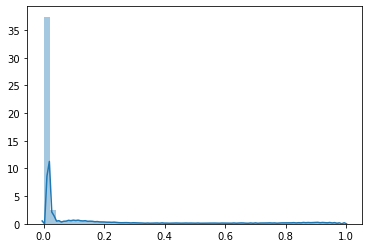

In [204]:
ax = sns.distplot(normalized)

In [327]:
X = normalized
#class_scaler = StandardScaler()
#X = class_scaler.fit_transform(X)
y = targets


In [328]:
def CMatrix(CM, labels=['High Value','Low Value']):
    df = pd.DataFrame(data=CM, index=labels, columns=labels)
    df.index.name='TRUE'
    df.columns.name='PREDICTION'
    df.loc['Total'] = df.sum()
    df['Total'] = df.sum(axis=1)
    return df

In [348]:
metrics1 = pd.DataFrame(index=['accuracy', 'precision', 'recall'], 
                      columns=['LogisticReg','RandomForest','NaiveBayes','KNN','ClassTree'])
metrics1

,LogisticReg,RandomForest,NaiveBayes,KNN,ClassTree
accuracy,NaN,NaN,NaN,NaN,NaN
precision,NaN,NaN,NaN,NaN,NaN
recall,NaN,NaN,NaN,NaN,NaN


In [330]:
print(stats.normaltest(X))

NormaltestResult(statistic=array([1347.74289411,  363.31324882,  393.24581899,  257.62294889,
        689.93021269,  443.51688859,  490.11703089, 4383.93230171,
        311.42943411, 1722.06115838, 1486.99653778, 1588.81685105,
       3431.18891412, 3393.72463535, 2893.26398013, 5199.28294235,
       1434.17919087, 1298.20352964,  405.96628675]), pvalue=array([2.19456795e-293, 1.28094481e-079, 4.05280203e-086, 1.14258217e-056,
       1.52601171e-150, 4.91508832e-097, 3.73627641e-107, 0.00000000e+000,
       2.36568890e-068, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 1.25512027e-282, 7.00714192e-089]))


In [148]:
#Split data into train and test

In [331]:
train_test_split(X, y)

[array([[0.89113279, 0.42906394, 0.        , ..., 0.        , 0.03300492,
         0.        ],
        [0.86474714, 0.24390304, 0.        , ..., 0.        , 0.        ,
         0.022173  ],
        [0.83805407, 0.11027027, 0.        , ..., 0.        , 0.        ,
         0.02205405],
        ...,
        [0.5073945 , 0.84959079, 0.        , ..., 0.        , 0.        ,
         0.01179987],
        [0.28977062, 0.95210347, 0.        , ..., 0.        , 0.        ,
         0.01034895],
        [0.73848549, 0.57794517, 0.        , ..., 0.        , 0.03210806,
         0.        ]]),
 array([[0.41164991, 0.88354126, 0.01004024, ..., 0.01004024, 0.        ,
         0.        ],
        [0.95770426, 0.        , 0.        , ..., 0.        , 0.        ,
         0.0266029 ],
        [0.47727396, 0.85909313, 0.00954548, ..., 0.        , 0.00954548,
         0.        ],
        ...,
        [0.68158135, 0.68158135, 0.        , ..., 0.        , 0.        ,
         0.01262188],
        [0.5

In [332]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.80, shuffle=True, random_state=None)

In [333]:
print(x_train.shape, y_train.shape)

(2791, 19) (2791,)


In [152]:
#training inputs are 2791 by 23 while the training targest are 2791(class column)

In [334]:
print(x_test.shape, y_test.shape)

(698, 19) (698,)


In [154]:
#1. Logistic regression Model

In [349]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [440]:
reg = LogisticRegression(class_weight='balanced', random_state=42)

In [441]:
reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [442]:
reg.score(x_train, y_train)

0.4948047294876388

In [443]:
log_pred = reg.predict(x_test)
metrics1.loc['accuracy','LogisticReg'] = accuracy_score(y_pred=log_pred, y_true=y_test)
metrics1.loc['precision','LogisticReg'] = precision_score(y_pred=log_pred, y_true=y_test)
metrics1.loc['recall','LogisticReg'] = recall_score(y_pred=log_pred, y_true=y_test)
#Confusion matrix
CM = confusion_matrix(y_pred=log_pred, y_true=y_test)
CMatrix(CM)

PREDICTION,High Value,Low Value,Total
TRUE,,,
High Value,211,272,483
Low Value,95,120,215
Total,306,392,698


In [471]:
print(f1_score(y_test, log_pred))
print(recall_score(y_test, log_pred))
print(accuracy_score(y_test, log_pred))
print(roc_auc_score(y_test, log_pred))

0.3953871499176277
0.5581395348837209
0.47421203438395415
0.4974962684770572


In [ ]:
#2. Random forest classifier

In [445]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=20, criterion='gini', max_depth= 4, max_features= 'auto',random_state=42, class_weight='balanced' )

random_forest.fit(x_train, y_train)

random_pred = random_forest.predict(x_test)
metrics1.loc['accuracy','RandomForest'] = accuracy_score(y_pred=random_pred, y_true=y_test)
metrics1.loc['precision','RandomForest'] = precision_score(y_pred=random_pred, y_true=y_test)
metrics1.loc['recall','RandomForest'] = recall_score(y_pred=random_pred, y_true=y_test)

CM = confusion_matrix(y_pred=random_pred, y_true=y_test)
CMatrix(CM)

PREDICTION,High Value,Low Value,Total
TRUE,,,
High Value,169,314,483
Low Value,78,137,215
Total,247,451,698


In [472]:
print(f1_score(y_test, random_pred))
print(recall_score(y_test, random_pred))
print(accuracy_score(y_test, random_pred))
print(roc_auc_score(y_test, random_pred))

0.41141141141141147
0.6372093023255814
0.4383954154727794
0.49355289132842217


In [ ]:
#3. NBC

In [356]:
from sklearn.naive_bayes import GaussianNB

NBC = GaussianNB()

NBC.fit(x_train, y_train)

nbc_pred = NBC.predict(x_test)
metrics1.loc['accuracy','NaiveBayes'] = accuracy_score(y_pred=nbc_pred, y_true=y_test)
metrics1.loc['precision','NaiveBayes'] = precision_score(y_pred=nbc_pred, y_true=y_test)
metrics1.loc['recall','NaiveBayes'] = recall_score(y_pred=nbc_pred, y_true=y_test)

CM = confusion_matrix(y_pred=nbc_pred, y_true=y_test)
CMatrix(CM)

PREDICTION,High Value,Low Value,Total
TRUE,,,
High Value,344,139,483
Low Value,143,72,215
Total,487,211,698


In [473]:
print(f1_score(y_test, nbc_pred))
print(recall_score(y_test, nbc_pred))
print(accuracy_score(y_test, nbc_pred))
print(roc_auc_score(y_test, nbc_pred))

0.3380281690140845
0.33488372093023255
0.5959885386819485
0.5235495209206028


In [ ]:
#4. KNN

In [357]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train, y_train)

knn_pred = knn.predict(x_test) 
metrics1.loc['accuracy','KNN'] = accuracy_score(y_pred=knn_pred, y_true=y_test)
metrics1.loc['precision','KNN'] = precision_score(y_pred=knn_pred, y_true=y_test)
metrics1.loc['recall','KNN'] = recall_score(y_pred=knn_pred, y_true=y_test)

CM = confusion_matrix(y_pred=knn_pred, y_true=y_test)
CMatrix(CM)

PREDICTION,High Value,Low Value,Total
TRUE,,,
High Value,470,13,483
Low Value,204,11,215
Total,674,24,698


In [474]:
print(f1_score(y_test, knn_pred))
print(recall_score(y_test, knn_pred))
print(accuracy_score(y_test, knn_pred))
print(roc_auc_score(y_test, knn_pred))

0.09205020920502091
0.05116279069767442
0.6891117478510028
0.5121238384130194


In [451]:
from sklearn.tree import DecisionTreeClassifier

class_tree = DecisionTreeClassifier(class_weight='balanced', min_samples_split=30, min_samples_leaf=10, random_state=42)

class_tree.fit(x_train, y_train)

# 4. Evaluate the model
dt_pred = class_tree.predict(x_test)
metrics1.loc['accuracy','ClassTree'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics1.loc['precision','ClassTree'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics1.loc['recall','ClassTree'] = recall_score(y_pred=y_pred_test, y_true=y_test)
#Confusion matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)

PREDICTION,High Value,Low Value,Total
TRUE,,,
High Value,276,207,483
Low Value,103,112,215
Total,379,319,698


In [475]:
print(f1_score(y_test, dt_pred))
print(recall_score(y_test, dt_pred))
print(accuracy_score(y_test, dt_pred))
print(roc_auc_score(y_test, dt_pred))

0.4194756554307116
0.5209302325581395
0.5558739255014327
0.5461794019933555


In [453]:
100*metrics1

,LogisticReg,RandomForest,NaiveBayes,KNN,ClassTree
accuracy,47.4212,43.8395,59.5989,68.9112,55.5874
precision,30.6122,30.3769,34.1232,45.8333,35.1097
recall,55.814,63.7209,33.4884,5.11628,52.093


In [160]:
#Find intercept and coefficients

In [455]:
reg.intercept_

array([-0.34088012])

In [231]:
reg.coef_

array([[ 0.41927881,  0.35336384, -0.26969688, -0.42614586, -0.38887993,
        -0.485309  ,  0.29568022,  0.00314508, -0.20136821, -0.03232401,
        -0.30905571,  0.04409475, -0.01509301, -0.11435147,  0.22068224,
        -0.0103567 ,  0.0967646 , -0.30855818,  0.02530988]])

In [232]:
unscaled_inputs.columns.values

array(['age', 'past_3_years_bike_related_purchases', 'owns_car', 'tenure',
       'property_valuation', 'gender_Female', 'gender_Male', 'gender_U',
       'state_NSW', 'state_QLD',
       'job_industry_category_Financial Services',
       'job_industry_category_Health', 'job_industry_category_IT',
       'job_industry_category_Property', 'job_industry_category_Retail',
       'job_industry_category_Telecommunications',
       'wealth_segment_Affluent Customer',
       'wealth_segment_High Net Worth', 'wealth_segment_Mass Customer'],
      dtype=object)

In [ ]:
#Feature selection

In [457]:
predict_probaR =random_forest.predict_proba(x_test)
predict_probaR

array([[0.49716919, 0.50283081],
       [0.37388298, 0.62611702],
       [0.59296263, 0.40703737],
       ...,
       [0.48490643, 0.51509357],
       [0.48298935, 0.51701065],
       [0.4828975 , 0.5171025 ]])

In [458]:
# retrieve just the probabilities for the positive class
pos_probsR = predict_probaR[:, 1]
pos_probsR

array([0.50283081, 0.62611702, 0.40703737, 0.49478188, 0.51112591,
       0.51132798, 0.51915798, 0.47409552, 0.52097831, 0.5182531 ,
       0.51767198, 0.51755552, 0.5093604 , 0.50930616, 0.52887513,
       0.5172603 , 0.50178773, 0.52919641, 0.51509357, 0.51112591,
       0.43095482, 0.51869525, 0.42041249, 0.51701065, 0.54627808,
       0.51441567, 0.52006946, 0.5183485 , 0.35632319, 0.27996966,
       0.51719926, 0.51755552, 0.52045847, 0.48111807, 0.52602414,
       0.51112591, 0.5173076 , 0.48990224, 0.51701065, 0.51780562,
       0.4591439 , 0.50390221, 0.51509357, 0.49427508, 0.50455347,
       0.35691561, 0.5183485 , 0.51491299, 0.51250011, 0.51932454,
       0.51112591, 0.5167615 , 0.48272371, 0.5208681 , 0.51292048,
       0.49094644, 0.42873714, 0.33649431, 0.50317182, 0.50754341,
       0.51701065, 0.52457999, 0.49687205, 0.59213752, 0.5167615 ,
       0.52231616, 0.50997213, 0.51506467, 0.3319236 , 0.51279384,
       0.52206973, 0.51058303, 0.50444028, 0.31238472, 0.49323

If probablility <0.5 = Low value
If probability >0.5 = High value

In [169]:
#PREDICT WHICH NEW CUSTOMERS ARE POTENTIAL HIGH VALUE CUSTOMERS

In [235]:
df = pd.read_csv(r"E:\My Python codes\new_customers.csv")
df

,name,gender,age,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation
0,Chickie Brister,Male,60,86,Manufacturing,Mass Customer,Yes,14,QLD,6
1,Morly Genery,Male,47,69,Property,Mass Customer,No,16,NSW,11
2,Ardelis Forrester,Female,43,10,Financial Services,Affluent Customer,No,10,VIC,5
3,Lucine Stutt,Female,38,64,Manufacturing,Affluent Customer,Yes,5,QLD,1
4,Melinda Hadlee,Female,52,34,Financial Services,Affluent Customer,No,19,NSW,9
...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand Romanetti,Male,58,60,Financial Services,Affluent Customer,No,9,NSW,7
996,Burk Wortley,Male,16,22,Health,Mass Customer,No,6,NSW,10
997,Melloney Temby,Female,63,17,Financial Services,Affluent Customer,Yes,15,QLD,2
998,Dickie Cubbini,Male,65,30,Financial Services,Mass Customer,Yes,19,QLD,2


In [190]:
print(stats.normaltest(df["age"]))

NormaltestResult(statistic=141.6429641800213, pvalue=1.7483208146552047e-31)


In [191]:
#statistical test for normality
stat, p = shapiro(df["age"])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.971, p=0.000


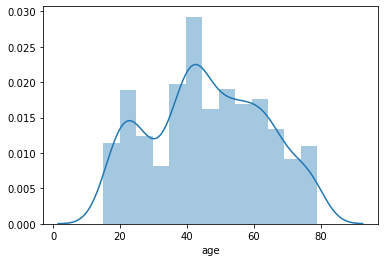

In [192]:
#Visual test for normality
ax = sns.distplot(df["age"])

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   name                                 1000 non-null   object
 1   gender                               1000 non-null   object
 2   age                                  1000 non-null   int64 
 3   past_3_years_bike_related_purchases  1000 non-null   int64 
 4   job_industry_category                1000 non-null   object
 5   wealth_segment                       1000 non-null   object
 6   owns_car                             1000 non-null   object
 7   tenure                               1000 non-null   int64 
 8   state                                1000 non-null   object
 9   property_valuation                   1000 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [236]:
#Get dummies
df_dummies = pd.get_dummies(df, columns=['gender','state','job_industry_category','wealth_segment']).drop(columns=['job_industry_category_Argiculture','job_industry_category_Manufacturing','state_VIC','job_industry_category_Entertainment'], axis=1)
df_dummies['owns_car'] = df_dummies['owns_car'].replace(['Yes','No'],['1','0']).astype(float)
df_dummies

,name,age,past_3_years_bike_related_purchases,owns_car,tenure,property_valuation,gender_Female,gender_Male,gender_U,state_NSW,state_QLD,job_industry_category_Financial Services,job_industry_category_Health,job_industry_category_IT,job_industry_category_Property,job_industry_category_Retail,job_industry_category_Telecommunications,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer
0,Chickie Brister,60,86,1.0,14,6,0,1,0,0,1,0,0,0,0,0,0,0,0,1
1,Morly Genery,47,69,0.0,16,11,0,1,0,1,0,0,0,0,1,0,0,0,0,1
2,Ardelis Forrester,43,10,0.0,10,5,1,0,0,0,0,1,0,0,0,0,0,1,0,0
3,Lucine Stutt,38,64,1.0,5,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0
4,Melinda Hadlee,52,34,0.0,19,9,1,0,0,1,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand Romanetti,58,60,0.0,9,7,0,1,0,1,0,1,0,0,0,0,0,1,0,0
996,Burk Wortley,16,22,0.0,6,10,0,1,0,1,0,0,1,0,0,0,0,0,0,1
997,Melloney Temby,63,17,1.0,15,2,1,0,0,0,1,1,0,0,0,0,0,1,0,0
998,Dickie Cubbini,65,30,1.0,19,2,0,1,0,0,1,1,0,0,0,0,0,0,0,1


In [173]:
#NORMALIZE DATA

In [237]:
unscaled_inputs1 = df_dummies.iloc[:,1:20]
unscaled_inputs1

,age,past_3_years_bike_related_purchases,owns_car,tenure,property_valuation,gender_Female,gender_Male,gender_U,state_NSW,state_QLD,job_industry_category_Financial Services,job_industry_category_Health,job_industry_category_IT,job_industry_category_Property,job_industry_category_Retail,job_industry_category_Telecommunications,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer
0,60,86,1.0,14,6,0,1,0,0,1,0,0,0,0,0,0,0,0,1
1,47,69,0.0,16,11,0,1,0,1,0,0,0,0,1,0,0,0,0,1
2,43,10,0.0,10,5,1,0,0,0,0,1,0,0,0,0,0,1,0,0
3,38,64,1.0,5,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0
4,52,34,0.0,19,9,1,0,0,1,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,58,60,0.0,9,7,0,1,0,1,0,1,0,0,0,0,0,1,0,0
996,16,22,0.0,6,10,0,1,0,1,0,0,1,0,0,0,0,0,0,1
997,63,17,1.0,15,2,1,0,0,0,1,1,0,0,0,0,0,1,0,0
998,65,30,1.0,19,2,0,1,0,0,1,1,0,0,0,0,0,0,0,1


In [392]:
unscaled_inputs1

,age,past_3_years_bike_related_purchases,owns_car,tenure,property_valuation,gender_Female,gender_Male,gender_U,state_NSW,state_QLD,job_industry_category_Financial Services,job_industry_category_Health,job_industry_category_IT,job_industry_category_Property,job_industry_category_Retail,job_industry_category_Telecommunications,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer
0,60,86,1.0,14,6,0,1,0,0,1,0,0,0,0,0,0,0,0,1
1,47,69,0.0,16,11,0,1,0,1,0,0,0,0,1,0,0,0,0,1
2,43,10,0.0,10,5,1,0,0,0,0,1,0,0,0,0,0,1,0,0
3,38,64,1.0,5,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0
4,52,34,0.0,19,9,1,0,0,1,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,58,60,0.0,9,7,0,1,0,1,0,1,0,0,0,0,0,1,0,0
996,16,22,0.0,6,10,0,1,0,1,0,0,1,0,0,0,0,0,0,1
997,63,17,1.0,15,2,1,0,0,0,1,1,0,0,0,0,0,1,0,0
998,65,30,1.0,19,2,0,1,0,0,1,1,0,0,0,0,0,0,0,1


In [393]:
#Normalize the inputs
normalized1 = preprocessing.normalize(unscaled_inputs1)
normalized1

array([[0.56613852, 0.81146521, 0.00943564, ..., 0.        , 0.        ,
        0.00943564],
       [0.54818184, 0.8047776 , 0.        , ..., 0.        , 0.        ,
        0.01166344],
       [0.94351804, 0.2194228 , 0.        , ..., 0.02194228, 0.        ,
        0.        ],
       ...,
       [0.93998446, 0.2536466 , 0.01492039, ..., 0.01492039, 0.        ,
        0.        ],
       [0.87685848, 0.40470392, 0.01349013, ..., 0.        , 0.        ,
        0.01349013],
       [0.72755121, 0.65714303, 0.0117347 , ..., 0.        , 0.        ,
        0.0117347 ]])

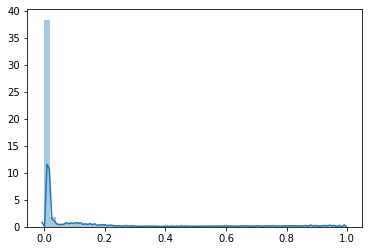

In [394]:
ax = sns.distplot(normalized1)

In [395]:
print(normalized1.shape)

(1000, 19)


In [459]:
#Predict probabilities of outcomes
predict_proba1 = random_forest.predict_proba(normalized1)
predict_proba1

array([[0.48616204, 0.51383796],
       [0.48298935, 0.51701065],
       [0.48087903, 0.51912097],
       ...,
       [0.49283059, 0.50716941],
       [0.47571155, 0.52428845],
       [0.48298935, 0.51701065]])

In [460]:
#Predict probability of outcome being 1
predict_proba1[:,:1]

array([[0.48616204],
       [0.48298935],
       [0.48087903],
       [0.51972869],
       [0.48081696],
       [0.48570694],
       [0.50297793],
       [0.47072093],
       [0.47872287],
       [0.47408216],
       [0.48125785],
       [0.49419615],
       [0.48857527],
       [0.49113823],
       [0.48671871],
       [0.48353223],
       [0.47776043],
       [0.48887409],
       [0.48132142],
       [0.49442986],
       [0.4912019 ],
       [0.51948424],
       [0.52285418],
       [0.59918481],
       [0.46675327],
       [0.50295505],
       [0.49201039],
       [0.46642319],
       [0.48749989],
       [0.48132142],
       [0.49097175],
       [0.4816515 ],
       [0.48490643],
       [0.47794352],
       [0.51069349],
       [0.48549325],
       [0.48132142],
       [0.48298935],
       [0.49687109],
       [0.48686515],
       [0.48749989],
       [0.62688497],
       [0.47735376],
       [0.48098041],
       [0.48219438],
       [0.47559627],
       [0.49697759],
       [0.478

In [461]:
inputs = unscaled_inputs1.copy()
inputs

,age,past_3_years_bike_related_purchases,owns_car,tenure,property_valuation,gender_Female,gender_Male,gender_U,state_NSW,state_QLD,job_industry_category_Financial Services,job_industry_category_Health,job_industry_category_IT,job_industry_category_Property,job_industry_category_Retail,job_industry_category_Telecommunications,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer
0,60,86,1.0,14,6,0,1,0,0,1,0,0,0,0,0,0,0,0,1
1,47,69,0.0,16,11,0,1,0,1,0,0,0,0,1,0,0,0,0,1
2,43,10,0.0,10,5,1,0,0,0,0,1,0,0,0,0,0,1,0,0
3,38,64,1.0,5,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0
4,52,34,0.0,19,9,1,0,0,1,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,58,60,0.0,9,7,0,1,0,1,0,1,0,0,0,0,0,1,0,0
996,16,22,0.0,6,10,0,1,0,1,0,0,1,0,0,0,0,0,0,1
997,63,17,1.0,15,2,1,0,0,0,1,1,0,0,0,0,0,1,0,0
998,65,30,1.0,19,2,0,1,0,0,1,1,0,0,0,0,0,0,0,1


In [462]:
#Include a column for predicted probabiloty of outcome being 1
inputs['Probability'] = predict_proba1[:,:1]

inputs

,age,past_3_years_bike_related_purchases,owns_car,tenure,property_valuation,gender_Female,gender_Male,gender_U,state_NSW,state_QLD,job_industry_category_Financial Services,job_industry_category_Health,job_industry_category_IT,job_industry_category_Property,job_industry_category_Retail,job_industry_category_Telecommunications,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,Probability
0,60,86,1.0,14,6,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0.486162
1,47,69,0.0,16,11,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0.482989
2,43,10,0.0,10,5,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0.480879
3,38,64,1.0,5,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0.519729
4,52,34,0.0,19,9,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0.480817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,58,60,0.0,9,7,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0.483393
996,16,22,0.0,6,10,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0.633782
997,63,17,1.0,15,2,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0.492831
998,65,30,1.0,19,2,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0.475712


In [463]:
#Create a condition to determing High and low value customers from the probabilities
condition = (inputs['Probability'] > 0.50)
inputs['Predicted_class'] = np.where(condition, 'High Value', 'Low Value')
inputs

,age,past_3_years_bike_related_purchases,owns_car,tenure,property_valuation,gender_Female,gender_Male,gender_U,state_NSW,state_QLD,...,job_industry_category_Health,job_industry_category_IT,job_industry_category_Property,job_industry_category_Retail,job_industry_category_Telecommunications,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,Probability,Predicted_class
0,60,86,1.0,14,6,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0.486162,Low Value
1,47,69,0.0,16,11,0,1,0,1,0,...,0,0,1,0,0,0,0,1,0.482989,Low Value
2,43,10,0.0,10,5,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0.480879,Low Value
3,38,64,1.0,5,1,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0.519729,High Value
4,52,34,0.0,19,9,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0.480817,Low Value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,58,60,0.0,9,7,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0.483393,Low Value
996,16,22,0.0,6,10,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0.633782,High Value
997,63,17,1.0,15,2,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0.492831,Low Value
998,65,30,1.0,19,2,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0.475712,Low Value


In [500]:
predicted_outputs=inputs.copy()

In [464]:
inputs.describe()

,age,past_3_years_bike_related_purchases,owns_car,tenure,property_valuation,gender_Female,gender_Male,gender_U,state_NSW,state_QLD,job_industry_category_Financial Services,job_industry_category_Health,job_industry_category_IT,job_industry_category_Property,job_industry_category_Retail,job_industry_category_Telecommunications,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,Probability
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,46.1510,49.836000,0.493000,11.388000,7.397000,0.513000,0.470000,0.017000,0.506000,0.228000,0.2610,0.204000,0.051000,0.064000,0.078000,0.025000,0.241000,0.251000,0.508000,0.501794
std,16.9339,27.796686,0.500201,5.037145,2.758804,0.500081,0.499349,0.129336,0.500214,0.419753,0.4394,0.403171,0.220108,0.244875,0.268306,0.156203,0.427904,0.433805,0.500186,0.044002
min,15.0000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.381893
25%,34.7500,26.750000,0.000000,7.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.482194
50%,45.0000,51.000000,0.000000,11.000000,8.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.487500
75%,60.0000,72.000000,1.000000,15.000000,9.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.502146
max,79.0000,99.000000,1.000000,22.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.767866


In [431]:
df

,name,gender,age,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation
0,Chickie Brister,Male,60,86,Manufacturing,Mass Customer,Yes,14,QLD,6
1,Morly Genery,Male,47,69,Property,Mass Customer,No,16,NSW,11
2,Ardelis Forrester,Female,43,10,Financial Services,Affluent Customer,No,10,VIC,5
3,Lucine Stutt,Female,38,64,Manufacturing,Affluent Customer,Yes,5,QLD,1
4,Melinda Hadlee,Female,52,34,Financial Services,Affluent Customer,No,19,NSW,9
...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand Romanetti,Male,58,60,Financial Services,Affluent Customer,No,9,NSW,7
996,Burk Wortley,Male,16,22,Health,Mass Customer,No,6,NSW,10
997,Melloney Temby,Female,63,17,Financial Services,Affluent Customer,Yes,15,QLD,2
998,Dickie Cubbini,Male,65,30,Financial Services,Mass Customer,Yes,19,QLD,2


In [501]:
#Let's merge original dataframe and inputs data frame because we want the customer details
merged = inputs.merge(df, left_index=True, right_index=True, how='inner').drop(columns=['age_x', 'past_3_years_bike_related_purchases_x', 'owns_car_x',
       'tenure_x', 'property_valuation_x', 'gender_Female', 'gender_Male',
       'gender_U', 'state_NSW', 'state_QLD',
       'job_industry_category_Financial Services',
       'job_industry_category_Health', 'job_industry_category_IT',
       'job_industry_category_Property', 'job_industry_category_Retail',
       'job_industry_category_Telecommunications',
       'wealth_segment_Affluent Customer', 'wealth_segment_High Net Worth',
       'wealth_segment_Mass Customer',], axis = 1)
merged

,Probability,Predicted_class,name,gender,age_y,past_3_years_bike_related_purchases_y,job_industry_category,wealth_segment,owns_car_y,tenure_y,state,property_valuation_y
0,0.486162,Low Value,Chickie Brister,Male,60,86,Manufacturing,Mass Customer,Yes,14,QLD,6
1,0.482989,Low Value,Morly Genery,Male,47,69,Property,Mass Customer,No,16,NSW,11
2,0.480879,Low Value,Ardelis Forrester,Female,43,10,Financial Services,Affluent Customer,No,10,VIC,5
3,0.519729,High Value,Lucine Stutt,Female,38,64,Manufacturing,Affluent Customer,Yes,5,QLD,1
4,0.480817,Low Value,Melinda Hadlee,Female,52,34,Financial Services,Affluent Customer,No,19,NSW,9
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.483393,Low Value,Ferdinand Romanetti,Male,58,60,Financial Services,Affluent Customer,No,9,NSW,7
996,0.633782,High Value,Burk Wortley,Male,16,22,Health,Mass Customer,No,6,NSW,10
997,0.492831,Low Value,Melloney Temby,Female,63,17,Financial Services,Affluent Customer,Yes,15,QLD,2
998,0.475712,Low Value,Dickie Cubbini,Male,65,30,Financial Services,Mass Customer,Yes,19,QLD,2


In [502]:
merged.columns

Index(['Probability', 'Predicted_class', 'name', 'gender', 'age_y',
       'past_3_years_bike_related_purchases_y', 'job_industry_category',
       'wealth_segment', 'owns_car_y', 'tenure_y', 'state',
       'property_valuation_y'],
      dtype='object')

In [509]:
#Rearrange the new dataframe
new_list = merged[['name', 'gender', 'age_y',
       'past_3_years_bike_related_purchases_y', 'job_industry_category',
       'wealth_segment', 'owns_car_y', 'tenure_y', 'state',
       'property_valuation_y', 'Probability', 'Predicted_class']]
new_list

,name,gender,age_y,past_3_years_bike_related_purchases_y,job_industry_category,wealth_segment,owns_car_y,tenure_y,state,property_valuation_y,Probability,Predicted_class
0,Chickie Brister,Male,60,86,Manufacturing,Mass Customer,Yes,14,QLD,6,0.486162,Low Value
1,Morly Genery,Male,47,69,Property,Mass Customer,No,16,NSW,11,0.482989,Low Value
2,Ardelis Forrester,Female,43,10,Financial Services,Affluent Customer,No,10,VIC,5,0.480879,Low Value
3,Lucine Stutt,Female,38,64,Manufacturing,Affluent Customer,Yes,5,QLD,1,0.519729,High Value
4,Melinda Hadlee,Female,52,34,Financial Services,Affluent Customer,No,19,NSW,9,0.480817,Low Value
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand Romanetti,Male,58,60,Financial Services,Affluent Customer,No,9,NSW,7,0.483393,Low Value
996,Burk Wortley,Male,16,22,Health,Mass Customer,No,6,NSW,10,0.633782,High Value
997,Melloney Temby,Female,63,17,Financial Services,Affluent Customer,Yes,15,QLD,2,0.492831,Low Value
998,Dickie Cubbini,Male,65,30,Financial Services,Mass Customer,Yes,19,QLD,2,0.475712,Low Value


In [505]:
new_list['Predicted_class'].value_counts()

Low Value     729
High Value    271
Name: Predicted_class, dtype: int64

In [506]:
#Filter dataframe to get only customers predicted as high value
high_value_customers=new_list[new_list['Predicted_class']=='High Value']
high_value_customers

,name,gender,age_y,past_3_years_bike_related_purchases_y,job_industry_category,wealth_segment,owns_car_y,tenure_y,state,property_valuation_y,Probability,Predicted_class
3,Lucine Stutt,Female,38,64,Manufacturing,Affluent Customer,Yes,5,QLD,1,0.519729,High Value
6,Rutledge Hallt,Male,41,23,Financial Services,Mass Customer,No,8,NSW,7,0.502978,High Value
21,Gaston Dallaghan,Male,24,44,Financial Services,Mass Customer,Yes,8,NSW,7,0.519484,High Value
22,Otis Ottey,Male,19,26,Manufacturing,Mass Customer,No,3,QLD,4,0.522854,High Value
23,Tabbatha Averill,Female,40,5,Health,Affluent Customer,Yes,13,NSW,8,0.599185,High Value
...,...,...,...,...,...,...,...,...,...,...,...,...
984,Pauline Dallosso,U,43,82,IT,Affluent Customer,Yes,0,NSW,10,0.523133,High Value
987,Lolly Prewer,Female,20,44,Health,Mass Customer,No,15,NSW,7,0.519906,High Value
992,Renie Laundon,Female,44,32,Entertainment,Mass Customer,Yes,8,QLD,3,0.511507,High Value
994,Datha Fishburn,Female,27,15,Retail,Mass Customer,No,3,VIC,12,0.560014,High Value


In [519]:
new_list1 = high_value_customers[['name', 'gender', 'age_y', 'Predicted_class']]

new_list1
new_list1.style.set_caption("Sample list of High Value Customers")

,name,gender,age_y,Predicted_class
3,Lucine Stutt,Female,38,High Value
6,Rutledge Hallt,Male,41,High Value
21,Gaston Dallaghan,Male,24,High Value
22,Otis Ottey,Male,19,High Value
23,Tabbatha Averill,Female,40,High Value
25,Rourke Gillbard,Male,72,High Value
34,Maisie Maddox,Female,40,High Value
41,Colene Fishleigh,Female,32,High Value
49,Thaxter Kingsbury,Male,67,High Value
64,Cristen Maroney,Female,18,High Value


In [507]:
high_value_customers.describe()

,age_y,past_3_years_bike_related_purchases_y,tenure_y,property_valuation_y,Probability
count,271.000000,271.000000,271.000000,271.000000,271.000000
mean,38.383764,27.723247,10.675277,7.313653,0.551069
std,15.911106,23.142893,5.468910,3.118843,0.059679
min,15.000000,0.000000,0.000000,1.000000,0.500069
25%,24.000000,10.000000,6.000000,5.000000,0.509081
50%,38.000000,23.000000,11.000000,8.000000,0.524601
75%,47.500000,39.000000,15.000000,10.000000,0.577316
max,77.000000,98.000000,22.000000,12.000000,0.767866


#There are 271 possible high value customers from the list

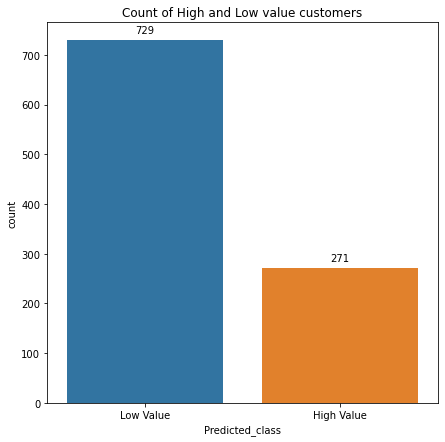

In [499]:
plt.figure(figsize=(7,7))
ax = sns.countplot('Predicted_class',data=new_list)
ax.set_title('Count of High and Low value customers')

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')